In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade plotly
!pip install --upgrade geopandas

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)
Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/crime/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# EDA

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
df.shape

(9017, 33)

In [ ]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [ ]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,13.177110,7.084618,55.066430,247.829433,776.428968,281.772208,494.656759,171.881335,40.816458,170.255517,5.926140,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,56.778798,42.350314,220.576876,941.233426,2935.008640,1164.677928,1895.366707,685.061783,172.042434,743.536365,25.985903,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,1.000000,0.000000,6.000000,31.000000,88.000000,12.000000,64.000000,11.000000,4.000000,13.000000,0.000000,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,3.000000,0.000000,17.000000,83.000000,217.000000,48.000000,152.000000,46.000000,11.000000,37.000000,1.000000,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,9.000000,2.000000,37.000000,177.000000,466.000000,140.000000,313.000000,125.000000,28.000000,104.000000,4.000000,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,1319.000000,1263.000000,6949.000000,16617.000000,53449.000000,22773.000000,35960.000000,11214.000000,4296.000000,19646.000000,599.000000,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [ ]:
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [ ]:
df.isnull().values.any()

False

In [ ]:
df=df[df['DISTRICT']=='TOTAL']

In [ ]:
df.drop(['DISTRICT'],axis=1,inplace=True)

In [ ]:
df=df.set_index(['STATE/UT'])

In [ ]:
df=df.reset_index()

In [ ]:
df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,2602,1555,136,871,0,871,1182,765,417,214,9,629,7220,16751,3051,13700,3001,788,5391,144,872,34947,420,3544,2271,5791,7,7400,34344,130089
1,ARUNACHAL PRADESH,2001,83,53,3,33,0,33,83,55,28,22,2,84,248,443,36,407,24,41,30,4,13,466,0,78,3,11,0,0,618,2342
2,ASSAM,2001,1356,481,40,817,0,817,1480,1070,410,532,14,687,2423,5367,350,5017,2953,374,575,46,441,5805,59,850,4,1248,0,2010,9315,36877
3,BIHAR,2001,3643,3419,250,888,0,888,2159,518,1641,1291,147,2203,3233,9701,1050,8651,8606,946,1659,85,502,7544,859,562,21,1558,83,2406,36667,88432
4,CHHATTISGARH,2001,880,529,45,959,0,959,207,171,36,87,19,338,4144,4812,920,3892,871,154,402,8,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,21,44,5,27,0,27,87,66,21,3,9,63,235,1549,894,655,49,34,234,2,9,42,5,45,25,73,0,3,1042,3606
404,D & N HAVELI,2012,7,2,0,3,0,3,13,9,4,2,0,2,22,68,36,32,11,10,4,0,12,25,0,2,0,0,0,23,112,318
405,DAMAN & DIU,2012,3,5,0,5,0,5,3,0,3,1,0,3,26,55,42,13,9,6,8,0,11,17,0,0,0,3,0,38,46,239
406,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60


In [ ]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [ ]:
len(df['STATE/UT'].unique())

34

In [ ]:
df=df.groupby(['STATE/UT','YEAR']).sum().reset_index()
df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,0,0,0,4,64,65,4,61,13,10,8,2,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,1,1,0,7,49,49,2,47,11,4,11,0,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,0,2,0,7,56,60,3,57,19,3,13,0,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,0,0,0,3,69,103,9,94,9,0,12,0,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,1,0,0,4,68,92,6,86,4,8,13,0,6,79,0,11,1,5,0,3,362,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,425,184,1055,613,462,17334,2593,14741,5425,876,2938,148,150,9033,451,2396,94,13663,5,3789,38177,105419
404,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,563,214,724,751,329,17133,3709,13424,6700,918,3298,153,344,11196,506,1942,108,16112,5,3623,38776,113036
405,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,581,288,687,798,388,19389,4123,15266,6809,1011,3260,214,331,12764,507,2465,163,17796,8,2847,49096,129616
406,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,574,236,939,760,455,21446,4642,16804,6019,1264,4171,207,413,13094,510,2363,200,19772,0,3249,56614,143197


# India Crime Visuals

## Sunburst graph

In [ ]:
fig2=px.sunburst(df,path=['STATE/UT','YEAR'],values='TOTAL IPC CRIMES',title="State and year wise segregation")
fig2.show()

## Tree map

In [ ]:
df.groupby(['YEAR']).sum().reset_index()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,35655,31013,3304,15694,0,15694,20860,13681,7179,6106,1540,19277,98153,233527,55819,177708,76057,14319,42544,1641,10484,269476,6738,33622,9656,49032,114,56750,679362,1714924
1,2002,34759,29940,3556,15970,3,15967,20527,13613,6914,6054,1774,18262,94101,230837,59234,171603,68806,13583,44173,1476,11763,263174,6687,33497,10027,49102,76,63628,709421,1731193
2,2003,32231,25535,3964,15357,1,15356,18836,12499,6337,5275,2195,17071,90929,229693,61862,167831,57254,13001,45399,2012,9305,259736,6078,32450,12220,49492,46,60270,680367,1668716
3,2004,33127,27371,3855,17682,2,17680,22118,14697,7421,5281,2205,17997,90615,254051,71809,182242,59904,13731,49617,1485,8599,275088,6900,33966,9871,56867,89,68990,718978,1778387
4,2005,32264,27564,3514,17701,7,17694,21242,14644,6598,5114,2677,17163,88015,255156,76847,178309,56174,13178,51247,2347,8404,269047,6673,33413,9759,56995,148,71064,717678,1766537
5,2006,32005,26720,3460,18725,2,18723,22549,16348,6201,4733,2929,17915,89716,256856,81585,175271,56554,13194,55763,2127,8447,262930,7481,35899,9822,61400,67,78146,752892,1820330
6,2007,31823,26871,3550,20139,1,20138,25873,19249,6624,4545,2976,18579,89163,268006,91381,176625,59828,15080,62990,2163,8993,271331,7955,37866,10783,74143,61,86538,804352,1933608
7,2008,32212,28209,3797,21001,0,21001,28694,21803,6891,4506,3083,19981,91816,297894,109012,188882,65947,16132,65086,2950,9208,283033,8043,39802,12084,79957,67,91460,839067,2044029
8,2009,31817,28669,3846,20928,2,20926,31324,24086,7238,4550,2781,21894,90337,302464,126803,175661,62885,15993,70718,2888,8702,277276,8242,38159,10891,88263,48,97686,850733,2071094
9,2010,32770,29110,3711,21665,6,21659,35232,28055,7177,4326,2584,22794,88677,307224,132509,174715,67518,16405,77154,2556,8456,287097,8248,40012,9881,92637,36,105429,910017,2173539


In [ ]:
fig3=px.treemap(df,path=['STATE/UT','YEAR'],values='TOTAL IPC CRIMES')
fig3.show()

## Year wise total crime stats

Text(0.5, 1.0, 'Year wise total crimes')

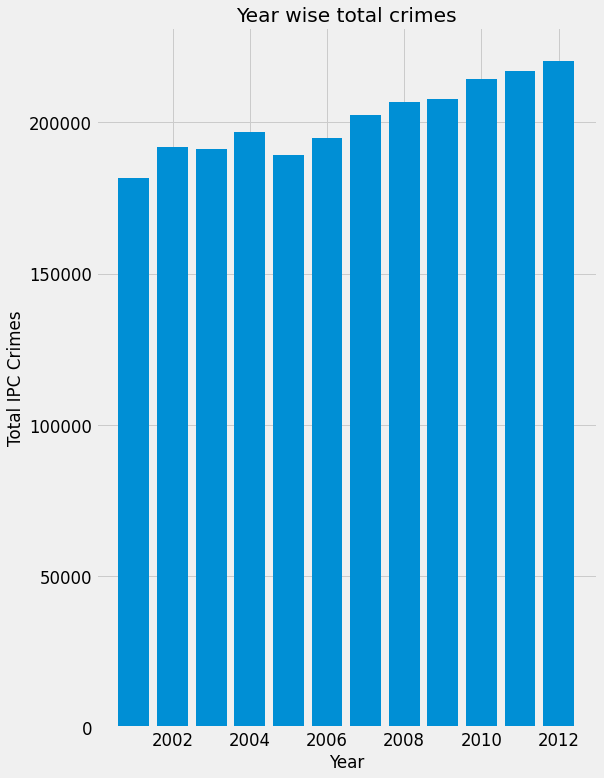

In [ ]:
plt.figure(figsize=(8,12))
plt.bar(df['YEAR'], df['TOTAL IPC CRIMES'])
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.title('Year wise total crimes')

**INFERENCES**

* The Crime Rate and the victims are increasing yearly.
* The decade started with 1.7 lakh and it ended with 2.3 lakh approximately.

In [ ]:
columns = ['MURDER','RAPE','KIDNAPPING & ABDUCTION','DACOITY','ROBBERY','BURGLARY','AUTO THEFT','RIOTS','CHEATING','COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']
len(columns)

14

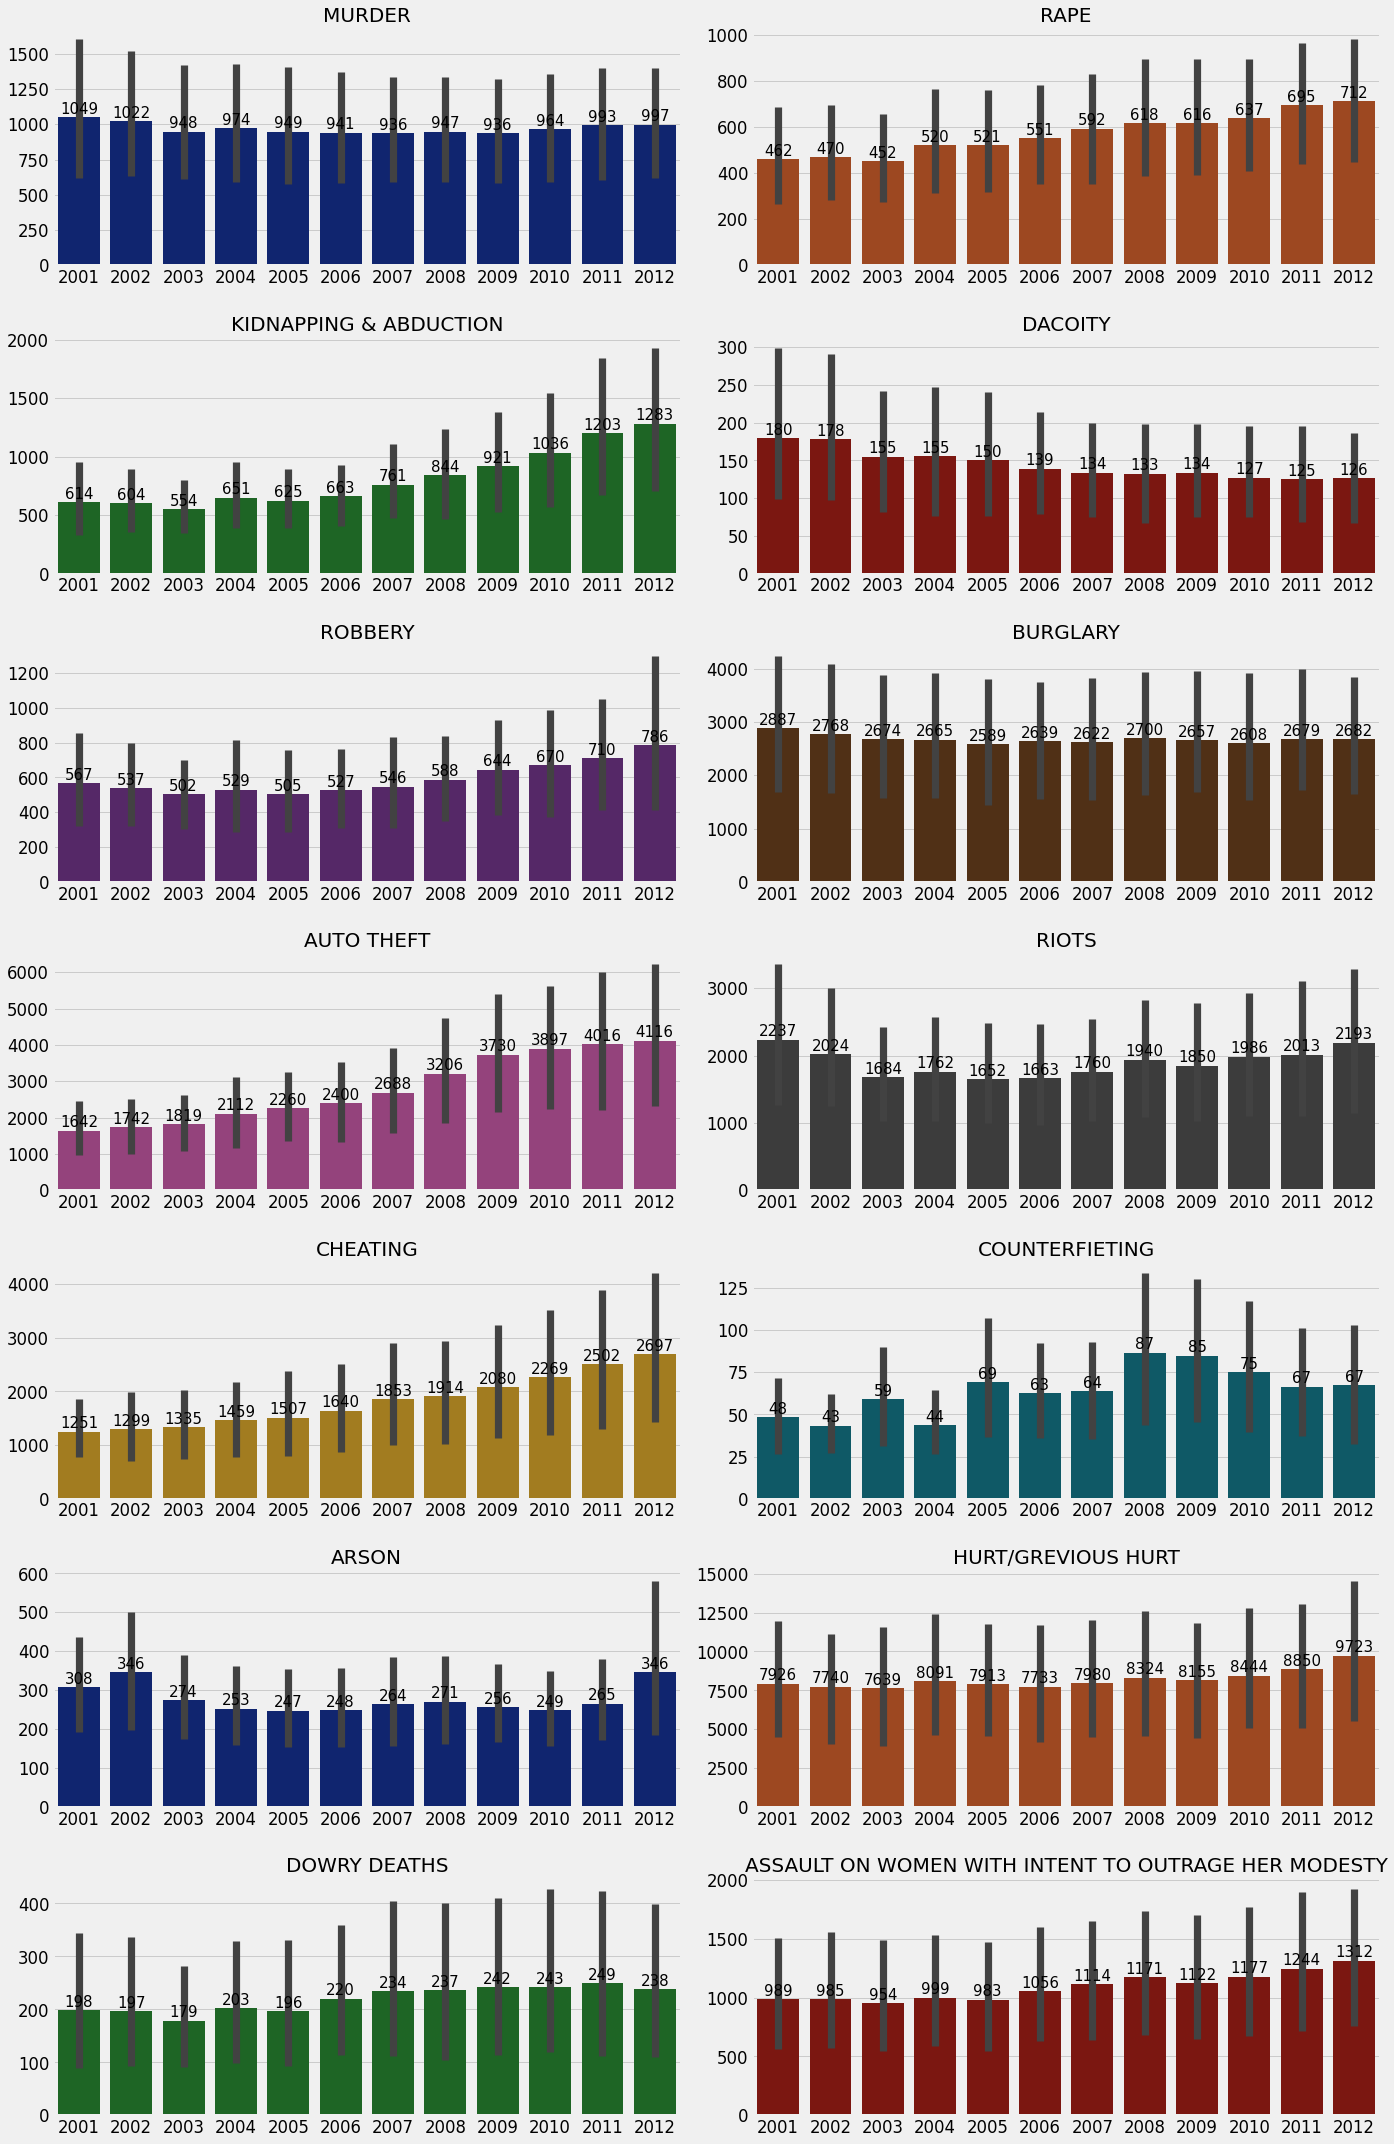

In [ ]:
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(7,2,i+1)
    ax= sns.barplot(data= df,x='YEAR',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## State wise total crime 

In [ ]:
ind=gpd.read_file('/content/drive/MyDrive/crime/india_state_geo.json~1/india_state_geo.json')

In [ ]:
ind.shape

(35, 10)

In [ ]:
ind.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')

In [ ]:
ind.dtypes

ID_0            int64
ISO            object
NAME_0         object
ID_1            int64
NAME_1         object
NL_NAME_1      object
VARNAME_1      object
TYPE_1         object
ENGTYPE_1      object
geometry     geometry
dtype: object

In [ ]:
ind.isnull().values.any()

True

In [ ]:
ind.drop(['ID_0','ISO','NL_NAME_1','VARNAME_1','ENGTYPE_1','ID_1'],axis=1,inplace=True)

In [ ]:
ind.rename(columns={'NAME_0':'country','NAME_1':'state','TYPE_1':'type'},inplace=True)

In [ ]:
ind.head()

,country,state,type,geometry
0,India,Andaman and Nicobar,Union Territor,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,India,Andhra Pradesh,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,India,Arunachal Pradesh,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,India,Assam,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,India,Bihar,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [ ]:
ind['state'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [ ]:
len(ind['state'].unique())

35

In [ ]:
fig1=df.groupby(['STATE/UT']).sum().reset_index()
fig1.drop('YEAR',axis=1,inplace=True)

In [ ]:
fig1.head(10)

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,0,74,892,1124,85,1039,140,72,253,11,98,1105,6,214,43,121,0,42,4443,9102
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,80,7605,97336,287190,72644,214546,27459,12128,98843,3107,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,4,843,2780,5178,1076,4102,340,505,520,52,250,5157,2,784,18,167,0,745,7396,27652
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,253,7467,34752,85475,15479,69996,34963,8402,12391,898,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,1265,23666,40293,153372,34221,119151,105096,15528,30690,826,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,31,33,397,2947,18474,9195,9279,755,411,2301,27,62,816,42,314,143,807,0,98,11605,40807
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,168,5113,44656,62873,20195,42678,10897,1705,6998,578,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,40,0,30,388,773,289,484,260,163,171,14,55,318,1,50,4,38,0,148,1859,4651
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,1,23,480,564,342,222,266,67,73,30,34,190,3,15,2,35,0,311,661,2948
9,GOA,487,269,67,350,0,350,236,164,72,55,0,298,3700,8045,2877,5168,813,561,1176,162,272,2287,19,328,123,191,0,2664,9948,32051


In [ ]:
ind.drop(9,inplace=True)

In [ ]:
ind.set_index('state',inplace=True)
ind.reset_index(inplace=True)

In [ ]:
merged=ind.merge(fig1, how='inner',left_on=ind.index,right_on=fig1.index)
merged.drop(['key_0','STATE/UT'],axis=1,inplace=True)

In [ ]:
states=ind['state'].unique()

In [ ]:
merged.head()

,state,country,type,geometry,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andaman and Nicobar,India,Union Territor,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",160,65,21,109,0,109,94,77,17,15,0,74,892,1124,85,1039,140,72,253,11,98,1105,6,214,43,121,0,42,4443,9102
1,Andhra Pradesh,India,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",31756,22420,1763,13479,2,13477,21239,14936,6303,1987,80,7605,97336,287190,72644,214546,27459,12128,98843,3107,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,Arunachal Pradesh,India,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",841,417,36,500,0,500,857,558,299,260,4,843,2780,5178,1076,4102,340,505,520,52,250,5157,2,784,18,167,0,745,7396,27652
3,Assam,India,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",15432,5662,718,16178,5,16173,27939,22920,5019,4170,253,7467,34752,85475,15479,69996,34963,8402,12391,898,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,Bihar,India,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",41245,40919,3672,13124,2,13122,37220,19389,17831,11099,1265,23666,40293,153372,34221,119151,105096,15528,30690,826,8509,189266,13548,7576,226,25680,440,44442,538591,1346293


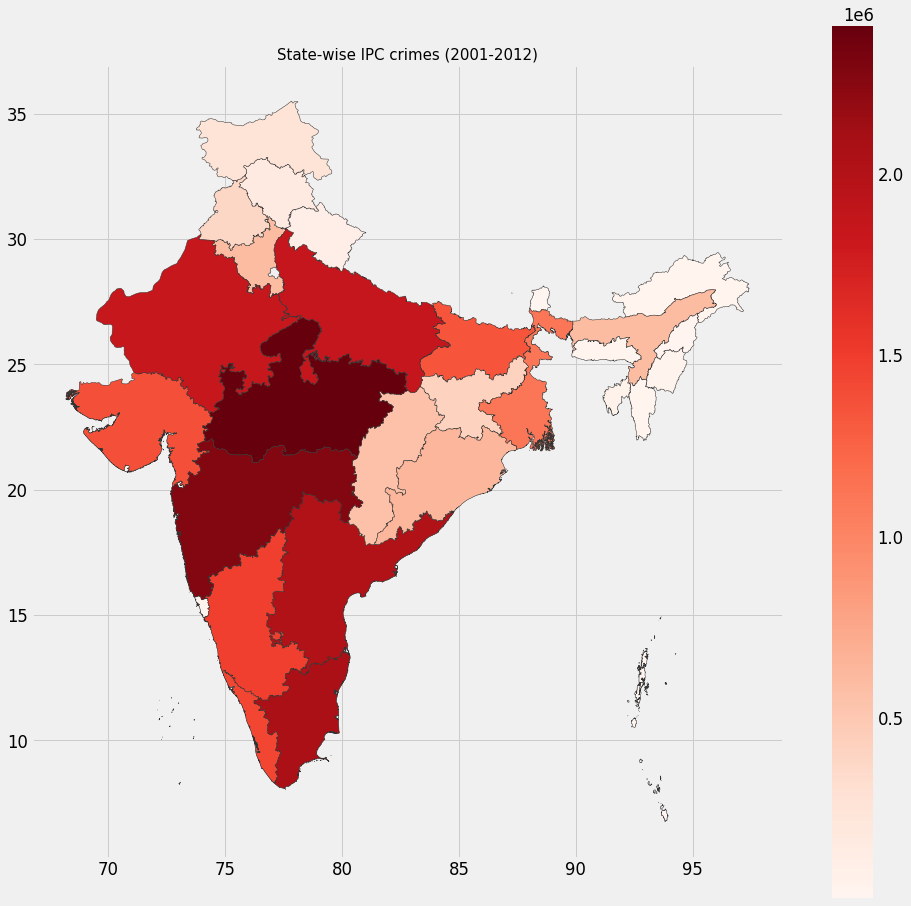

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title('State-wise IPC crimes (2001-2012)',fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='TOTAL IPC CRIMES', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

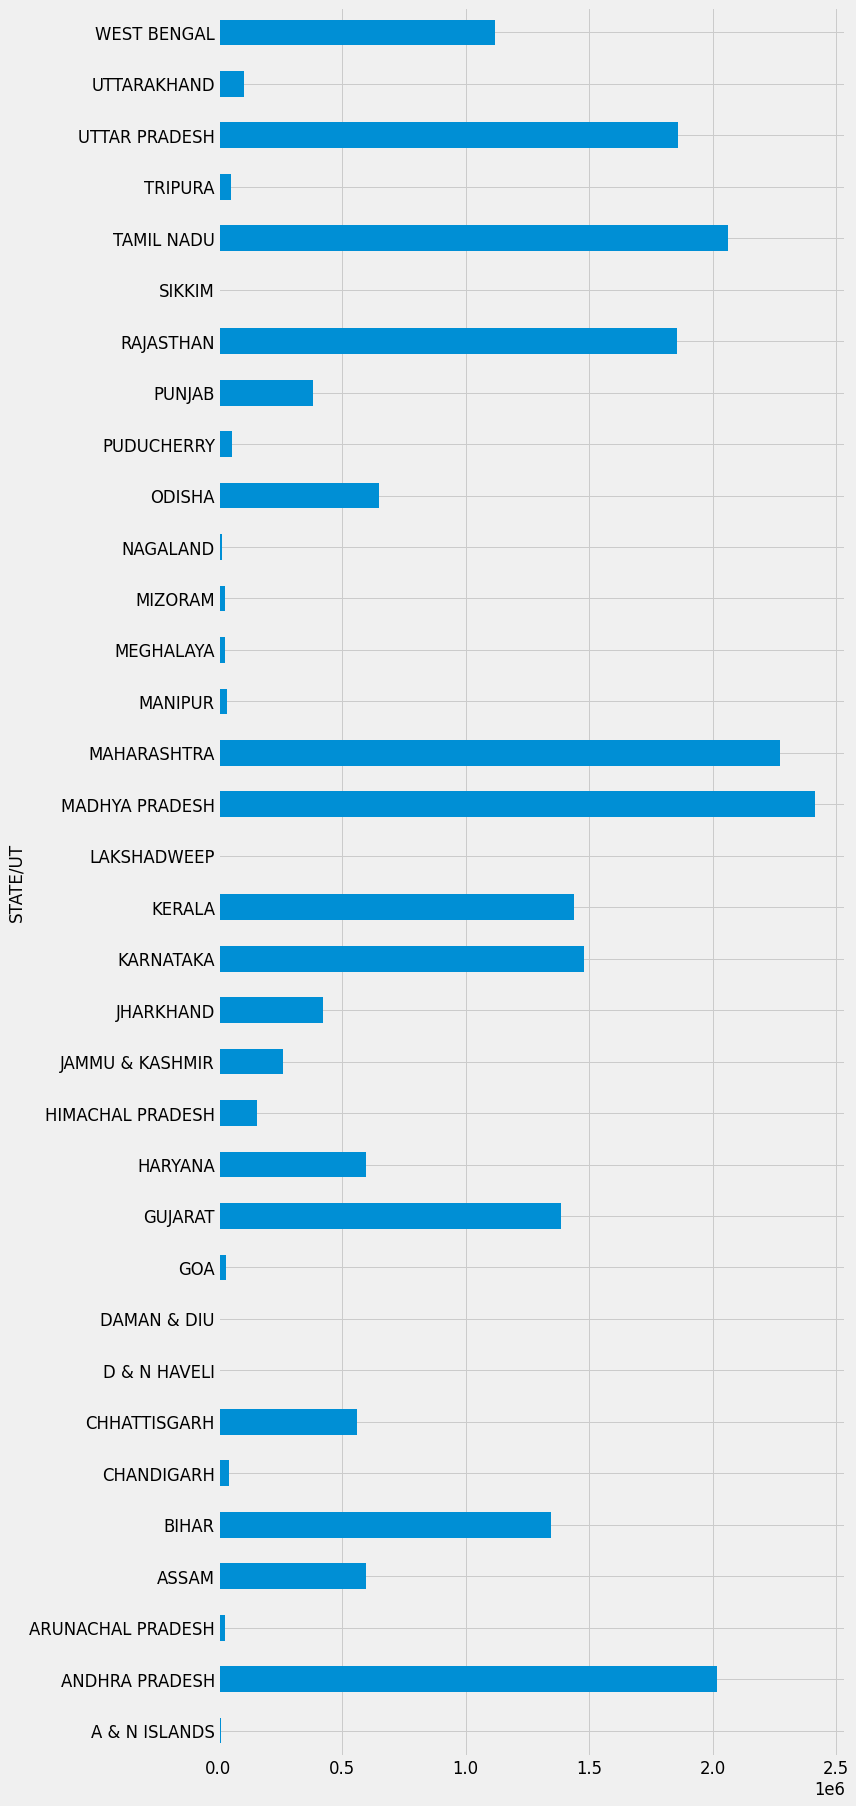

In [ ]:
fig1.set_index('STATE/UT',inplace=True)
fig1['TOTAL IPC CRIMES'].plot(kind='barh',figsize=(10,30))

## Types of Crimes

In [ ]:
df.columns

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
murder=df['MURDER'].sum()
rape=df['RAPE'].sum()
kidnapping=df['KIDNAPPING & ABDUCTION'].sum()
robbery=df['ROBBERY'].sum() 
riots=df['RIOTS'].sum() 
dacoity=df['DACOITY'].sum() 
burglary=df['BURGLARY'].sum() 
theft=df['THEFT'].sum() 
cheating=df['CHEATING'].sum() 
counterfieting=df['COUNTERFIETING'].sum() 
dowry=df['DOWRY DEATHS'].sum() 
others=df['TOTAL IPC CRIMES'].sum() - (murder+rape+kidnapping+robbery+riots+dacoity+burglary+theft+cheating+counterfieting+dowry)

In [ ]:
crime_type = ['Murder','Rape','Kidnapping','Robbery','Riots','Dacoity','Burglary','Theft','Cheating','Counterfieting','Dowry','Others']
crime_type_vals = [murder,rape,kidnapping,robbery,riots,dacoity,burglary,theft,cheating,counterfieting,dowry,others]

fig3 = go.Figure(data=[go.Pie(labels=crime_type, values=crime_type_vals,sort=False,marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])
fig3.update_layout(title='Major types of crime in India (2001 - 2012)')
fig3.show()

**INFERENCES**

* Out of all the named crimes, Theft is having highest number of victims and Dowry is having the least victims.

In [ ]:
crimes = ['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION',
        'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'RIOTS', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE']

scy = df.groupby(['YEAR'])[crimes].sum().reset_index()

fig1 = px.line(scy, x='YEAR', y=crimes)
fig1


**INFERENCES**

* From 2000-07 Hurt/Grevious hurt is having highest number of victimes and then after 2007 it was over taken by Theft.
* Auto theft and Burglary are followed after Hurt and Theft.

# Rape

In [ ]:

victims = pd.read_csv('/content/drive/MyDrive/crime/20_Victims_of_rape.csv')

In [ ]:
victims.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [ ]:
victims.head(5)

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


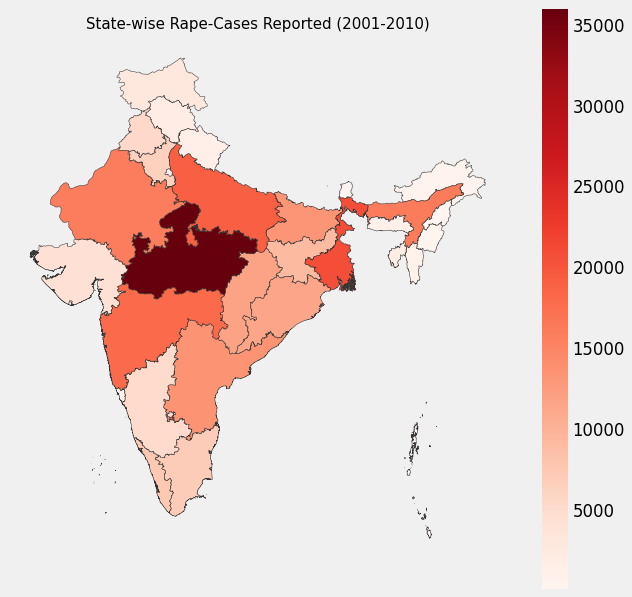

In [ ]:

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='RAPE', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


**INFERENCE**

* Top 3 states having highest number of cases - Madhya Pradhesh, 
Chhatisgarh, Rajasthan.

* Top 3 states having lowest number of cases - Tripura, Manipur, Goa.

In [ ]:

safe1 = victims.groupby('Area_Name')['Rape_Cases_Reported'].sum().sort_values(ascending=True).reset_index()
s_state = safe1.head(10)
fig = px.bar(s_state, x='Rape_Cases_Reported', y='Area_Name',title='Most Safe States for Women')
fig

In [ ]:
unsafe=safe1.tail(10)
#fig = px.bar(unsafe, x='Rape_Cases_Reported', y='Area_Name',title='Most UnSafe States for Women')
#fig
px.pie(unsafe, names='Area_Name', values='Rape_Cases_Reported',title='Most UnSafe States for Women')

In [ ]:
victims['Subgroup'].unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [ ]:
tr_victims = victims[victims['Subgroup']=='Total Rape Victims']

s1 = tr_victims.groupby('Year')['Rape_Cases_Reported'].sum().reset_index()

fig1 = px.bar(s1, x='Year', y='Rape_Cases_Reported',title='Victims Of Rape Yearly')
fig1

In [ ]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

sum_cases=inc_victims.groupby('Year')['Rape_Cases_Reported'].sum().reset_index()
#sum_cases.columns=['Year', 'Rape_Cases_Reported']

fig1 = px.bar(sum_cases,x='Year',y='Rape_Cases_Reported', title='Victims Of Incest Rape Yearly')
fig1.show()


**INFERENCES**

* In 2005, around 750 cases were reported which is the highest number of that decade.

* The year 2010 recorded the lowest number of cases i.e 288.

In [ ]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=8)])

fig.show()

**INFERENCES**

* Women between the age group of 18-30 have been most affected.

* Women between the age group above 50 have been least affected.

# **Murder**

In [ ]:
murder = pd.read_csv('/content/drive/MyDrive/crime/32_Murder_victim_age_sex.csv')

In [ ]:
murder.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Victims_Above_50_Yrs', 'Victims_Total', 'Victims_Upto_10_15_Yrs',
       'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
       'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs'],
      dtype='object')

In [ ]:

murder.Year.unique()
murder.Area_Name.unique()
murder.Sub_Group_Name.unique()
murder.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


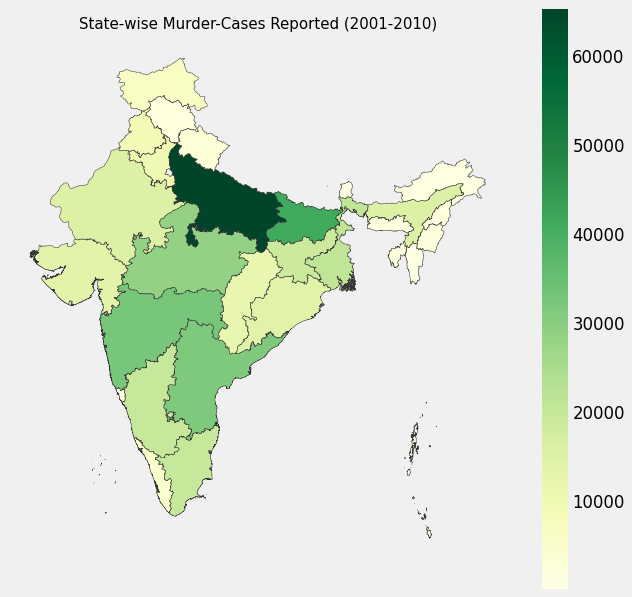

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Murder-Cases Reported (2001-2010)', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='MURDER', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


In [ ]:
murder['Sub_Group_Name'].unique()

array(['2. Female Victims', '1. Male Victims', '3. Total'], dtype=object)

In [ ]:
tm = murder[murder['Sub_Group_Name']=='3. Total']

m1 = tm.groupby(['Year'])['Victims_Total'].sum().reset_index()

fig1 = px.bar(m1, x='Year', y='Victims_Total', title='Total Victims Of Murder per Year')
fig1

**INFERENCE**

* We can see that the no. of victims is gradually decresing over the years.

In [ ]:
m2 = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index()
m2 = m2[m2['Sub_Group_Name']!='3. Total']

fig2 = px.bar(m2, x='Year', y=['Victims_Total'], color='Sub_Group_Name', title='Gender Distribution of Victims per Year')
fig2

**INFERENCES**

* Males are more prone to be murder victim as compared to women . 

* Over the years the number of male victims has decreased and the number of female victims is almost same as the previous years.

In [ ]:

list = ['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs','Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']

m_age = murder.groupby(['Year'])[list].sum().reset_index()

fig3=px.bar(m_age, x='Year', y= list, title='Age Distribution of Victims per Year', barmode='group')
fig3

**INFERENCES**

* Compared to people of other ages the age group 18 - 30 years is more prone to be victim of the murder. 

* The rise in 2002 numbers is maybe due to the riots of gujrat . 

* Another age group which is most likely to be victim of murder is 30 - 50. Compared to these two groups other age groups are very small in number. From all the groups children are most likely to be safe.

In [ ]:
list = ['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs','Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']
mag = murder.groupby(['Sub_Group_Name'])[list].sum().reset_index() 
mag = mag[mag['Sub_Group_Name']!='3. Total']

fig4 = px.bar(mag, x='Sub_Group_Name', y=list, title='Age & Gender Distribution of Victims', barmode='group')
fig4

**INFERENCES**

* Males of age 18-30 are more likely to be get killed as compared to the any of the age-gender group. 
* After them male of 30-50 are prone to be victim of murder. Similar to male age groups females of age 18-30 are more likely to be get killed .

In [ ]:
murders = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
murders= murders.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = True).reset_index()
 
murdersbad = murders.head(15) #top highest states
murdersgood = murders.tail(15) #top lowest states/ut

fig5 = px.bar(murdersbad, x='Victims_Total', y='Area_Name', title='15 States with Lowest No Of Victims')
fig5

In [ ]:
fig6 = px.bar(murdersgood, x='Victims_Total', y='Area_Name', title='15 States with Highest No Of Victims')
fig6

# **Human Rights Violations By Police**

In [ ]:
police_hr = pd.read_csv('/content/drive/MyDrive/crime/35_Human_rights_violation_by_police.csv')

In [ ]:
police_hr.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Registered_under_Human_Rights_Violations',
       'Policemen_Chargesheeted', 'Policemen_Convicted'],
      dtype='object')

In [ ]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Extortion                                  190
HR_Disappearance of Persons                   190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Indignity to Women                         185
HR_Fake encounter killings                    185
HR_False implication                          182
HR_Violation against Terrorists/Extremists    182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

In [ ]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['orange'])
fig.show()

**INFERENCES**

* In 2008, highest number of cases were recorded - 506
* The year 2006 recorded least number of cases i.e 58

In [ ]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings'] 
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

In [ ]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication'] 
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

In [ ]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
           marker_color='purple'),
    go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen',title='Policemen Chargesheeted vs Policemen Convicted')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**INFERENCES**

* In 2009, 69.87% of policemen have been convicted - highest of the decade.
* For about three consecutive years, 2005, 2006, 2007 there has been no conviction of policemen.

# **Property Theft Cases**

In [ ]:
prop_theft = pd.read_csv('/content/drive/MyDrive/crime/10_Property_stolen_and_recovered.csv')

In [ ]:
prop_theft.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

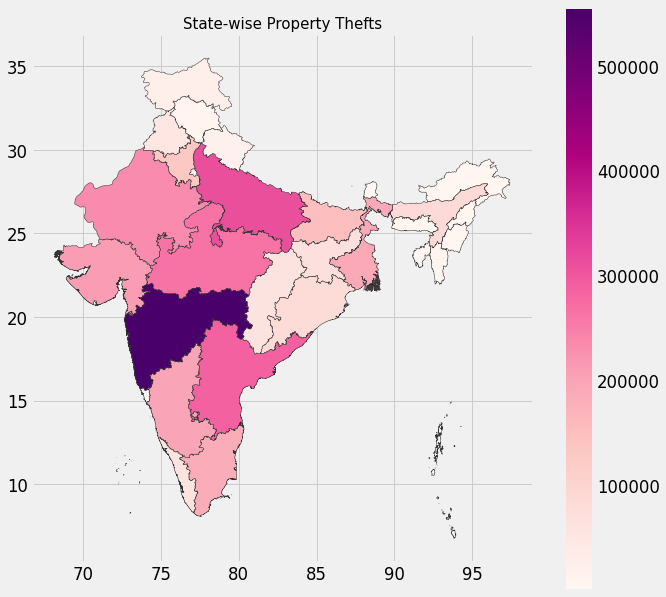

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('State-wise Property Thefts',fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='THEFT', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig

In [ ]:
prop_theft['Sub_Group_Name'].unique()

array(['3. Burglary', '5. Criminal Breach of Trust', '1. Dacoity',
       '6. Other Property', '2. Robbery', '4. Theft',
       '7. Total Property Stolen & Recovered'], dtype=object)

In [ ]:
th = prop_theft.groupby(['Year','Sub_Group_Name'])['Cases_Property_Stolen'].sum().reset_index()

fig1 = px.bar(th, x='Year', y='Cases_Property_Stolen', color='Sub_Group_Name',barmode='group')
fig1


**INFERENCES**

* From the 7 differnt theft's, Highest is stolen property and it is incresing every year.
* Second heighest is theft and it is also increasing yearly.
* The Lowest is Dacoity and it is in same range every year.

In [ ]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen,prop_theft_recovered]

colors = ['red','green']

#fig=px.bar(prop_theft,x=prop_group, y=prop_vals, color=prop_vals)

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])
fig.update_layout(title='Property Stolen vs Property Recovered Cases')

fig.show()

**INFERENCES**

* Only 30% of stolen property is recovered in the decade.

In [ ]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
           marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**INFERENCES**

* Even if we see yearly, only 25-30% property stolen was recovered by police.